### Kaggle Project - Titanic 

In [16]:
# Download data
!kaggle competitions download -c titanic -p "Data/Raw"

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [27]:
# Install required packages
%pip install missingno

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.7/28.7 MB 9.7 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/3.6.1/libexec/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [17]:
# Unzip downloaded files
import zipfile as zf

titanic = zf.ZipFile("Data/Raw/Titanic.zip")

titanic.extractall("Data/Raw")

titanic.close()

# View files extracted
from os import listdir

listdir("Data/Raw")

In [31]:
# Read in train.csv and print the first five rows
import pandas as pd

train = pd.read_csv("Data/Raw/train.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

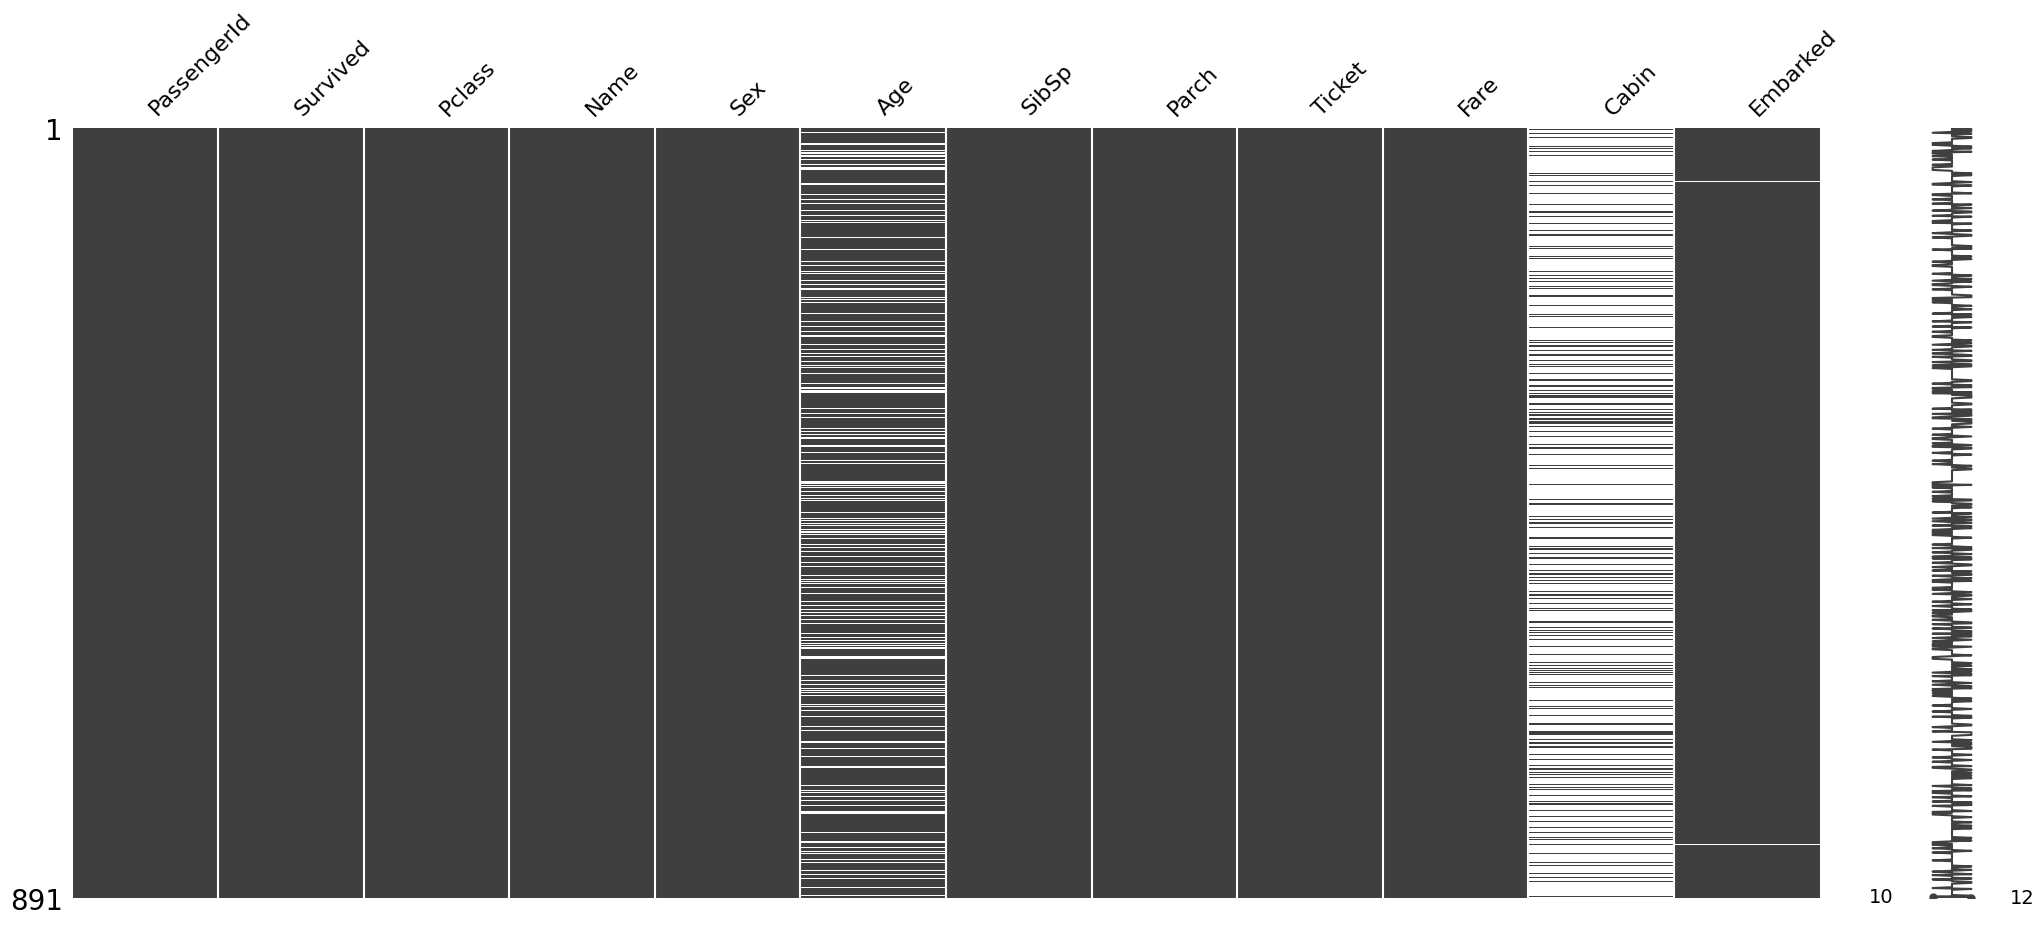

In [32]:
# Plot missing value matrix
import missingno as msno

msno.matrix(train)

We see that most NAs occured for variable Cabin, followed by Age and only a couple of values missing for embarked. I want to see if there is any patterns on the missing data (e.g. people not survived? People in lower cabin class?).

<Axes: >

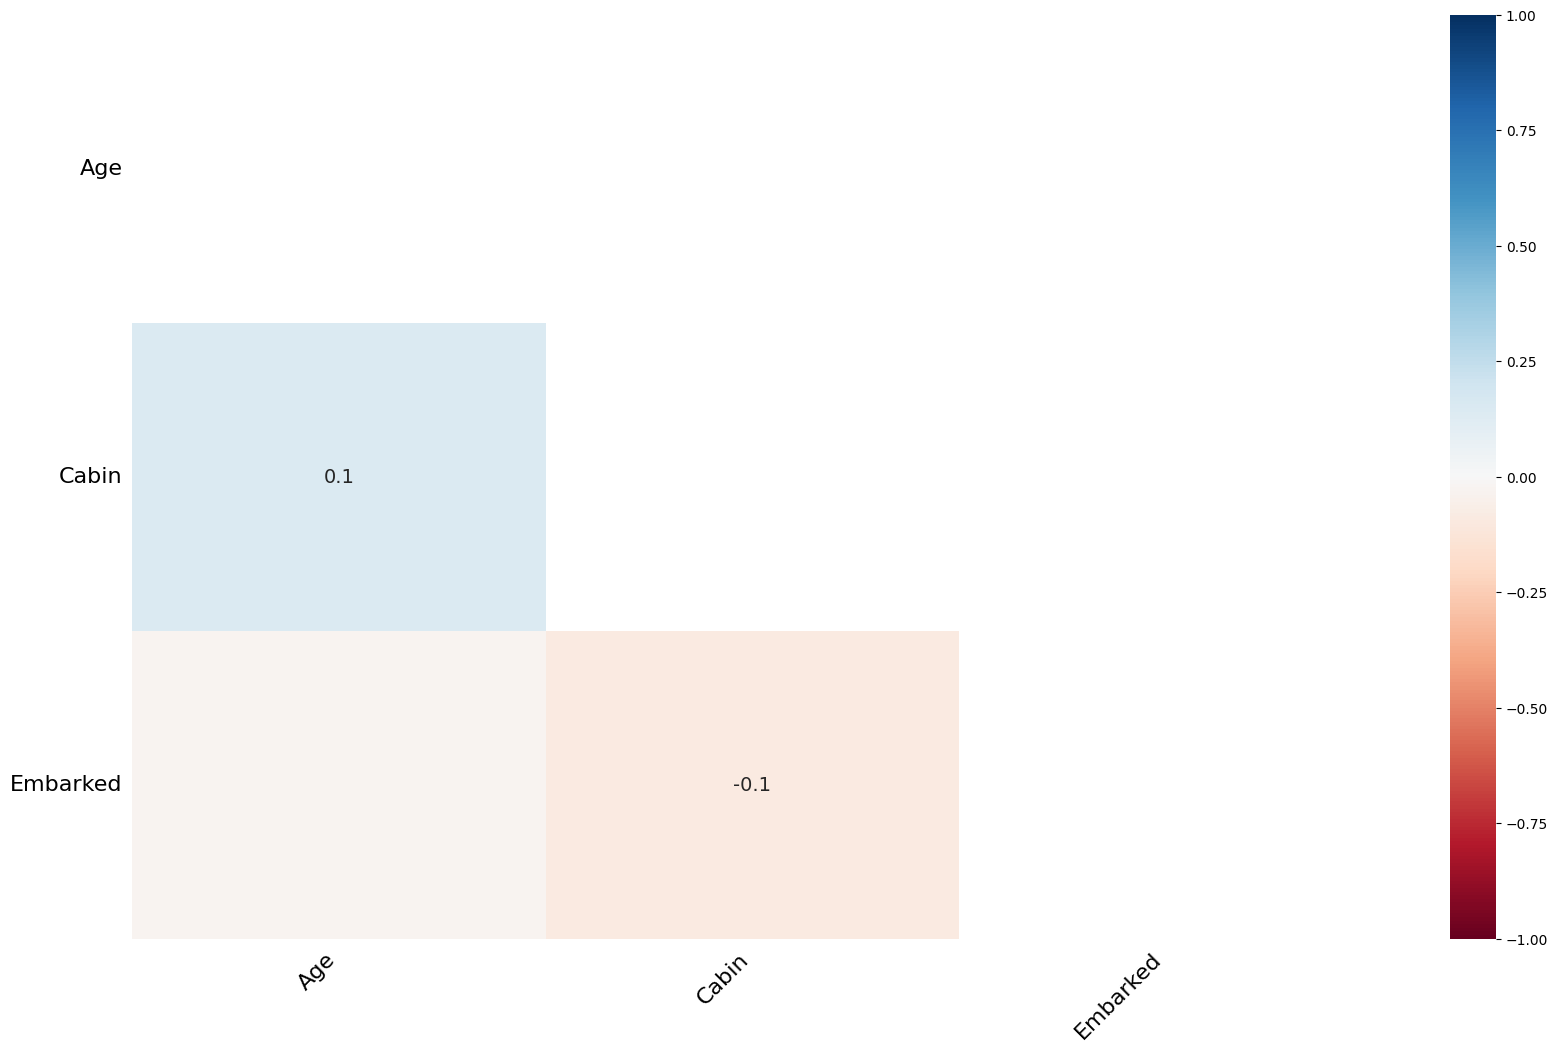

In [33]:
msno.heatmap(train)

Correlation between the missing values are low. Even though there is a small relationship between Age and Cabin, and Cabin and Embarked. Suggesting that people at certain ages and embarked from certain ports are more likely to have Cabin number missing. 

In [39]:
# Plot data correlations
#import numpy as np

corr = train.corr(numeric_only = True)
corr.style.background_gradient(cmap = "coolwarm")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Survived has the highest correlation with Pclass (as expected). So lower class (which has a higher number) means lower survival chance.
- Fare has the highest correlation with Pclass, again as expected.
- Number of parents/children aboard correlates with number of siblings/spouses aboard, suggesting that people tend to travel with more than one family members, especially for those that tend to be younger (negative corr. with age).
- Young people tend to stay in lower class.
- Interestingly, even though Parch and SibSp are positively correlated to Fare, they are also positively correlated with Pclass (which might be due to the age factor?). Maybe they tend to be in lower class, but usually in the better cabins within that class.

In [13]:
# Install packages
%pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 3.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 8.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 7.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 8.8 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.5 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 8.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 2.9 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/3.6.1/libexec/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use

In [14]:
titanic

<zipfile.ZipFile filename='Data/Raw/Titanic.zip' mode='r'>